<a href="https://colab.research.google.com/github/rexremigius/Machine-Learning/blob/main/HeartDisease_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project - Heart Disease detection using Logistic Regression 



**Importing datasets and visualizing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
link='/content/drive/MyDrive/MLdatasets/heart (1).csv'
data=pd.read_csv(link)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Total count of data with and without disease**

In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Percentage of Patients**

In [ ]:
countNoDisease = len(data[data.target== 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


**Relation between Age and Disease**

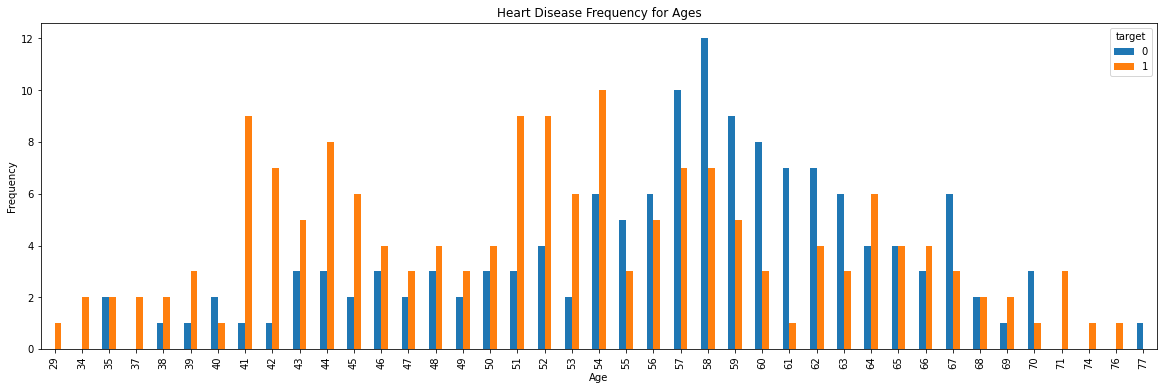

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

**Finding Mean of values**

In [ ]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


**Plotting Graph between age and Slope(ST segment) and other various features**

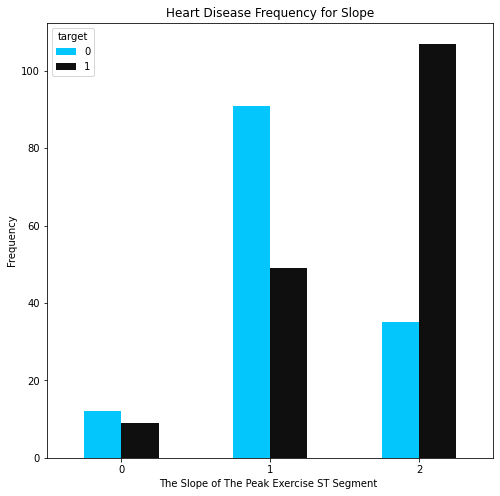

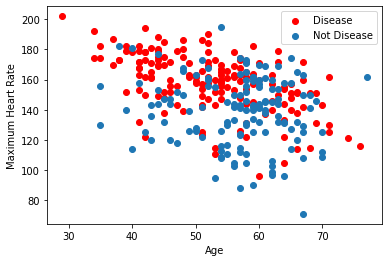

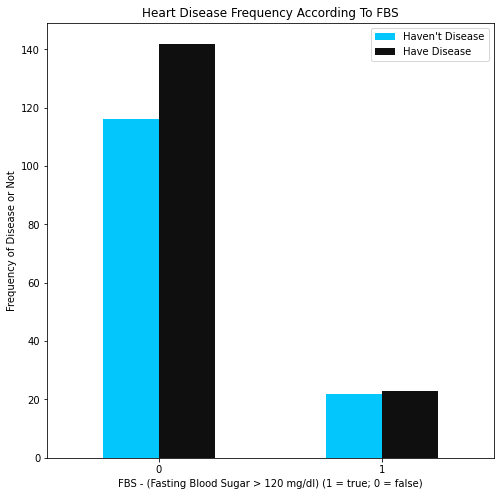

In [ ]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(8,8),color=['#03C6FC','#0F0F0F' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(8,8),color=['#03C6FC','#0F0F0F' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Plotting graph for Logistic Regression**

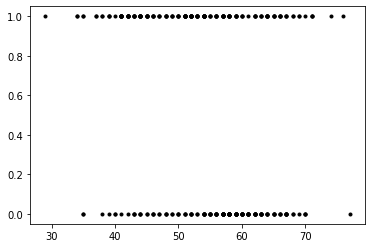

In [ ]:
plt.scatter(data.age,data.target,marker=".",color='black')

**Training the datasets using sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['age']],data.target,train_size=0.2)
X_test

,age
149,42
273,58
73,51
46,44
152,64
...,...
51,66
257,50
84,42
228,59


**Accuracy of Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
train_acc = lr.score(X_train,y_train)*100

accuracies['Logistic Regression'] = acc
print("Train Accuracy {:.2f}%".format(train_acc))
print("Test Accuracy {:.2f}%".format(acc))
print("Error Rate {:.2f}%".format(100-acc))

Train Accuracy 63.33%
Test Accuracy 63.37%
Error Rate 36.63%


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_head_lr)
y_predicted = lr.predict(X_test)
lr.predict_proba(X_test)
lr.predict(X_test)
print("Confusion Matrix:\n",cm_lr)

Confusion Matrix:
 [[71 39]
 [50 83]]


**Function for predicting the Disease**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def disease_prediction(age):
    z = 0.042 * age - 1.53
    y = sigmoid(z)
    if(y>=0.5 and y<0.8):
      print("Prone to heart disease ! Stay healthy :|")    
    elif(y>0.8):
        print("Very prone to heart Disease ! Please consult your doctor :(")
    elif(y>0.3 and y<0.5):
        print("Less prone to heart Disease ! You are safe :)")
    else:
        print("Very Less prone to Heart Disease ! You are absolutely safe :)")

In [ ]:
age= 20
disease_prediction(age)

Less prone to heart Disease ! You are safe :)
